# Support Vector Regression

Support Vector Regression(SVR) is a type of Support Vector Machine (SVM) that is commonly used for regression tasks, unlike SVM that is commonly used for classification. It was proposed by Vladimir Vapnik, Harris Drucker, Christopher J. C. Burges, Linda Kaufman and Alexander J. Smola in the 1996.

In notebook we will see some example in 2D to understand how it works and the difference with SVM but SVR is not limited to 2D data, it can be used for high-dimensional data as well and so in the last part of notebook we will see a real case study with a dataset with n-dimension(n>2).

SVR as SVM use Support Vectors that are the data points that are closest to decision boundary(or hyperplane).
This methods introduces a loss function which make regression possible, in fact it approximate the output data so that the error is within a certain threshold(ε). ε is added to the model to obtain a sparse solution, so it replace the quadratic loss function(that is common in normalized linear regression) with the ε-insensitive error function. This means that errors within a certain distance ε from the true value are not penalized.


## Introduction

In the following example we can see how use a SVM for classification, in particular a Linear SVM. It's interesting to go and understand later in the next code which is the difference between SVM and SVR.
To run the code we use sklearn library to call SVC(Support Vector Classification), matplotlib it's useful to plot the final result and numpy it's useful to create some random points.

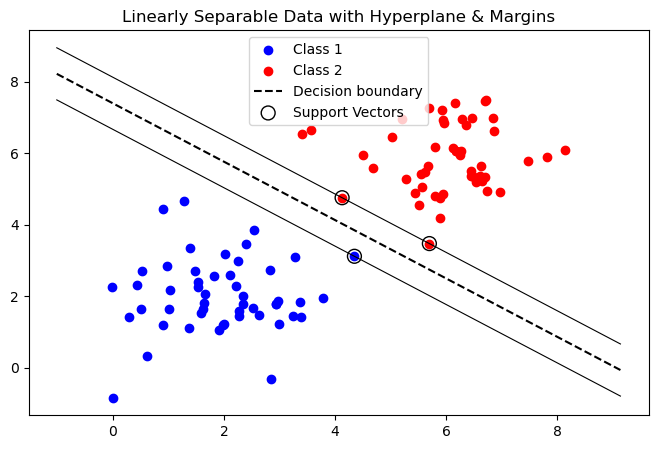

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Random data generation in 2D
x1 = np.random.randn(50, 2) + np.array([2, 2]) #put the center in (2,2)
x2 = np.random.randn(50, 2) + np.array([6, 6]) #put the center in (6,6)
X = np.vstack((x1, x2))
y = np.hstack((np.zeros(50), np.ones(50)))

# Fit Linear SVM model
clf = SVC(kernel="linear", C=1e5)
clf.fit(X, y)


w = clf.coef_[0] # Get the weights of the hyperplane
b = clf.intercept_[0] # Get the bias term


xx = np.linspace(min(X[:,0])-1, max(X[:,0])+1, 100)
yy = -(w[0]/w[1]) * xx - b/w[1]

margin = 1 / np.linalg.norm(w) # Calculate margin
# Calculate margin lines
yy_down = yy - np.sqrt(1 + (w[0]/w[1])**2) * margin
yy_up   = yy + np.sqrt(1 + (w[0]/w[1])**2) * margin

# Plotting
plt.figure(figsize=(8, 5))

plt.scatter(x1[:,0], x1[:,1], color='blue', label='Class 1')
plt.scatter(x2[:,0], x2[:,1], color='red', label='Class 2')

plt.plot(xx, yy, 'k--', label="Decision boundary")

plt.plot(xx, yy_down, 'k-', linewidth=0.8)
plt.plot(xx, yy_up, 'k-', linewidth=0.8)

plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1],s=100, facecolors='none', edgecolors='k', label="Support Vectors")

plt.title("Linearly Separable Data with Hyperplane & Margins")
plt.legend()



In the previous code we use some fomula to calculate the hyperplane and the margin lines. The hyperplane is defined by the equation $ w^T x + b = 0 $, where $ w $ is the weight vector and $ b $ is the bias term. The margin lines are parallel to the hyperplane and are located at a distance of $ \frac{1}{\|w\|} $ from it.

In the case above, we generated two sets of 2D data points. The first set is linearly separable, while the second set is not linearly separable. It's a good example to highlight type of data where Linear SVM can work. It's a good example of classification problem where Linear SVM can work.
Now the problem is that not always the data are linearly separable so, in that case, we must use other type of SVM. In the follow example we can see an example of non linearly separable data.

In the preview code we can see a good example of classification but now with SVR we will see a different process.

## SVR

### Regression
Regression is a statistical and machine learning method used to predict continuous numerical values of a dependent variable from one or more independent variables, by finding a function that best approximates the relationship between inputs and outputs.

Below we can see an implementation of SVR with Linear Kernel. This s an easy example to understand how SVR works and what see a regression problem.


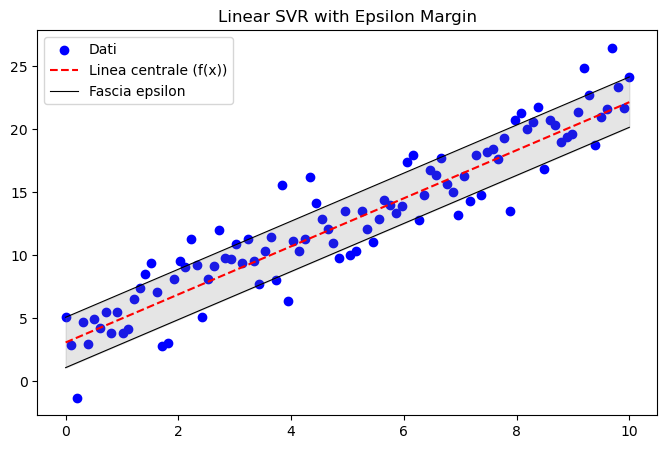

In [6]:
from sklearn.svm import SVR

X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 2 * X.ravel() + 3 + np.random.randn(100) * 2

svr = SVR(kernel='linear', epsilon=2)
svr.fit(X, y)

y_pred = svr.predict(X)

epsilon = svr.epsilon
y_up = y_pred + epsilon
y_down = y_pred - epsilon

plt.figure(figsize=(8,5))
plt.scatter(X, y, color='blue', label='Dati')
plt.plot(X, y_pred, 'r--', label='Linea centrale (f(x))')
plt.plot(X, y_up, 'k-', linewidth=0.8, label='Fascia epsilon')
plt.plot(X, y_down, 'k-', linewidth=0.8)
plt.fill_between(X.ravel(), y_down, y_up, color='gray', alpha=0.2)
plt.legend()
plt.title("Linear SVR with Epsilon Margin")
plt.show()


It's easy implement SRV with sklearn library. In the example above we generated some 1D data with a linear relationship and some noise. We then fit a Linear SVR model to the data and plotted the results, including the epsilon margin.

The parameter $ \varepsilon $ defines the width of the epsilon-insensitive tube around the regression function.
- Small $ \varepsilon $: the model becomes more sensitive to small deviations from the true values, leading to a tighter fit to the training data.
- Large $ \varepsilon $: the model allows for larger deviations from the true values without penalty, resulting in a smoother and more generalized function.

## Mathematical Formulation
Most of the mathematical formulation are find in Bishop's book "Pattern Recognition and Machine Learning".
Linear SVR aims to find a function

\begin{gather*}
y_i = w^T \phi(x_i) + b
\end{gather*}


that approximates the data $ (x_i, y_i) $ within a tolerance $ \varepsilon $.
$\epsilon$-insensibile $E_\epsilon$ è data da:
$$E_{\epsilon}(y(\mathbf{x}) - t) = \begin{cases} 0 & \text{se } |y(\mathbf{x}) - t| < \epsilon \\ |y(\mathbf{x}) - t| - \epsilon & \text{altrimenti} \end{cases} \quad$$

Minimizing model complexity and errors outside the epsilon-insensitive tube:

\begin{gather*}
\min_{w, b, \xi_i, \xi_i^*} \quad \frac{1}{2} \|w\|^2 + C \sum_{i=1}^{m} (\xi_i + \hat{\xi_i})
\end{gather*}

With:
-  $ \quad \frac{1}{2} \|w\|^2 $ : complexity of the model (we want to minimize it)
-  The second part is for the errors outside the epsilon-intensitive tube.

subject to:
- For points above the tube:    $ y_i - w^T \phi(x_i) - b \leq \varepsilon + \xi_i $
- For points below the tube:    $ w^T \phi(x_i) + b - y_i \leq \varepsilon + \hat{\xi_i} $
- Slack variables must be non-negative:     $ \xi_i, \hat{\xi_i} \geq 0 $

Where:
- $ w $ are the model weights.
- $ b $ is the bias.
- $ \varepsilon $ defines the epsilon-insensitive tube.
- $ \xi_i, \hat{\xi_i} $ are slack variables for errors outside the tube.
- $ C $ balances model complexity versus tolerance of errors.

This formulation can be write in another easy way, without the slack variables.  If the problem is not feasible, we introduce slack variables, which are the data points that fall outside of the ε-insensitive tube.
In real cases, most of time the problem is not feasible because it's very strange that all data points fall in the right way.

To minimize the objective function we can use the method of Lagrange multipliers, introducing multipliers $ \alpha_n \geq 0, \hat{\alpha_n} \geq 0 $ and $ \mu_n \geq 0, \hat{\mu_n} \geq 0 $. Now we optimize the Lagrangian:
\begin{gather*}
L = \frac{1}{2} \|w\|^2 + C \sum_{i=1}^{m} (\xi_i + \hat{\xi_i}) - \sum_{i=1}^{m} \alpha_i (\varepsilon + \xi_i + w^T \phi(x_i) + b - t_i) - \sum_{i=1}^{m} \hat{\alpha_i} (\varepsilon + \hat{\xi_i} - w^T \phi(x_i) + b + t_i) - \sum_{i=1}^{m} (\mu_i \xi_i + \hat{\mu_i} \hat{\xi_i})
\end{gather*}

I have change $ y_n $ with $ w^T \phi(x_i) + b $.

And now we must find the derivatives and set them to zero:
\begin{gather*}
\frac{\partial L}{\partial w} = 0 \Rightarrow w = \sum_{i=1}^{m} (\alpha_i - \hat{\alpha_i}) x_i \\
\frac{\partial L}{\partial b} = 0 \Rightarrow \sum_{i=1}^{m} (\alpha_i - \hat{\alpha_i}) = 0 \\
\frac{\partial L}{\partial \xi_i} = 0 \Rightarrow \alpha_i + \mu_i = C \\
\frac{\partial L}{\partial \hat{\xi_i}} = 0 \Rightarrow \hat{\alpha_i} + \hat{\mu_i} = C
\end{gather*}

Now we can substitute the derivatives in the Lagrangian and obtain the dual problem:
\begin{gather*}
\tilde{L}(\boldsymbol{a}, \hat{\boldsymbol{a}}) = -\frac{1}{2} \sum_{i=1}^{m} \sum_{j=1}^{m} (\alpha_i - \hat{\alpha_i})(\alpha_j - \hat{\alpha_j}) K(x_i, x_j) - \varepsilon \sum_{i=1}^{m} (\alpha_i + \hat{\alpha_i}) + \sum_{i=1}^{m} t_i (\alpha_i - \hat{\alpha_i})
\end{gather*}



How can we say we introduce the kernel $ K(x_i, x_j) =  \phi(x_i)^T \phi(x_j) $.
Now, we have a costrained maximization problem but we can note that we have $a_i \geq 0$ and $\hat{a_i} \geq 0$ and $ \mu_n \geq 0, \hat{\mu_n} \geq 0 $ as before. So, thanks to Laplacian derivated we have:
\begin{gather*}
0 \leq \alpha_i \leq C \\
0 \leq \hat{\alpha_i} \leq C
\end{gather*}

And I can put all in the first function that it's write in this chatper to obtain:
\begin{gather*}
y(\boldsymbol{x}) = \sum_{i=1}^{m} (\alpha_i - \hat{\alpha_i}) K(x_i, x) + b
\end{gather*}

with kernel function.
The corrisponding Karush-Kuhn-Tucker (KKT) conditions(that are a generalization of the method of Lagrange multipliers and thay are useful for solving optimization problems with constraints), are given by:
\begin{gather*}
\alpha_i (\varepsilon + \xi_i + w^T \phi(x_i) + b - t_i) = 0 \\
\hat{\alpha_i} (\varepsilon + \hat{\xi_i} - w^T \phi(x_i) + b + t_i) = 0 \\
(C - a_n)\xi_i = 0 \\
(C - \hat{a_n})\hat{\xi_i} = 0 \\
\end{gather*}

From that we can see that:
- $ \alpha_i \neq 0 $ if and only if $ (\varepsilon + \xi_i + w^T \phi(x_i) + b - t_i) = 0 $
    - if $ \xi_i = 0 $ then $ |y(x_i) - t_i| = \varepsilon $ (on the boundary of the tube)
    - if $ \xi_i > 0 $ then $ y(x_i) - t_i > \varepsilon $ (outside the tube)
- Same for $ \hat{\alpha_i} $
- We have $ \varepsilon $ that is strictly positive and $ \xi_i, \hat{\xi_i} $ that are non-negative
    - So we have that $ \forall x_i $, either $ \alpha_i = 0 $, $ \hat{\alpha_i} = 0 $ or both.

During the computation, we can only consider the data points for which $ \alpha_i $ or $ \hat{\alpha_i} $ are non-zero. These points are called support vectors and they define the regression function. All point that are equal to zero are in the limit of the epsilon-insensitive tube and all the point that are outside the tube have $ \alpha_i = C $ or $ \hat{\alpha_i} = C $(that we can change in our code).

To compute $ b $ we can use the KKT conditions. For any support vector $ x_i $ with $ 0 < \alpha_i < C $ or $ 0 < \hat{\alpha_i} < C $, we have $ \xi_i = 0 $ or $ \hat{\xi_i} = 0 $. So, we can rearrange the KKT conditions to solve for $ b $:
\begin{gather*}
b = t_i - w^T \phi(x_i) - \varepsilon = t_i - \varepsilon - \sum_{i=1}^{m} (\alpha_i - \hat{\alpha_i}) K(x_i, x) \quad \text{if } 0 < \alpha_i < C \\
b = t_i - w^T \phi(x_i) + \varepsilon = t_i + \varepsilon \sum_{i=1}^{m} (\alpha_i - \hat{\alpha_i}) K(x_i, x) \quad \text{if } 0 < \hat{\alpha_i} < C
\end{gather*}

## Non-linear SVR with polynomial kernel
Now we can try to use a non-linear kernel, that can be polynomial, RBF or Sigmoid kernel. Non-linear SVR can capture more complex relationships in the data compared to linear model.
The formula in the previous setting are both for linear and polynomial kernel, the only difference is the kernel function $ K(x_i, x_j) $.


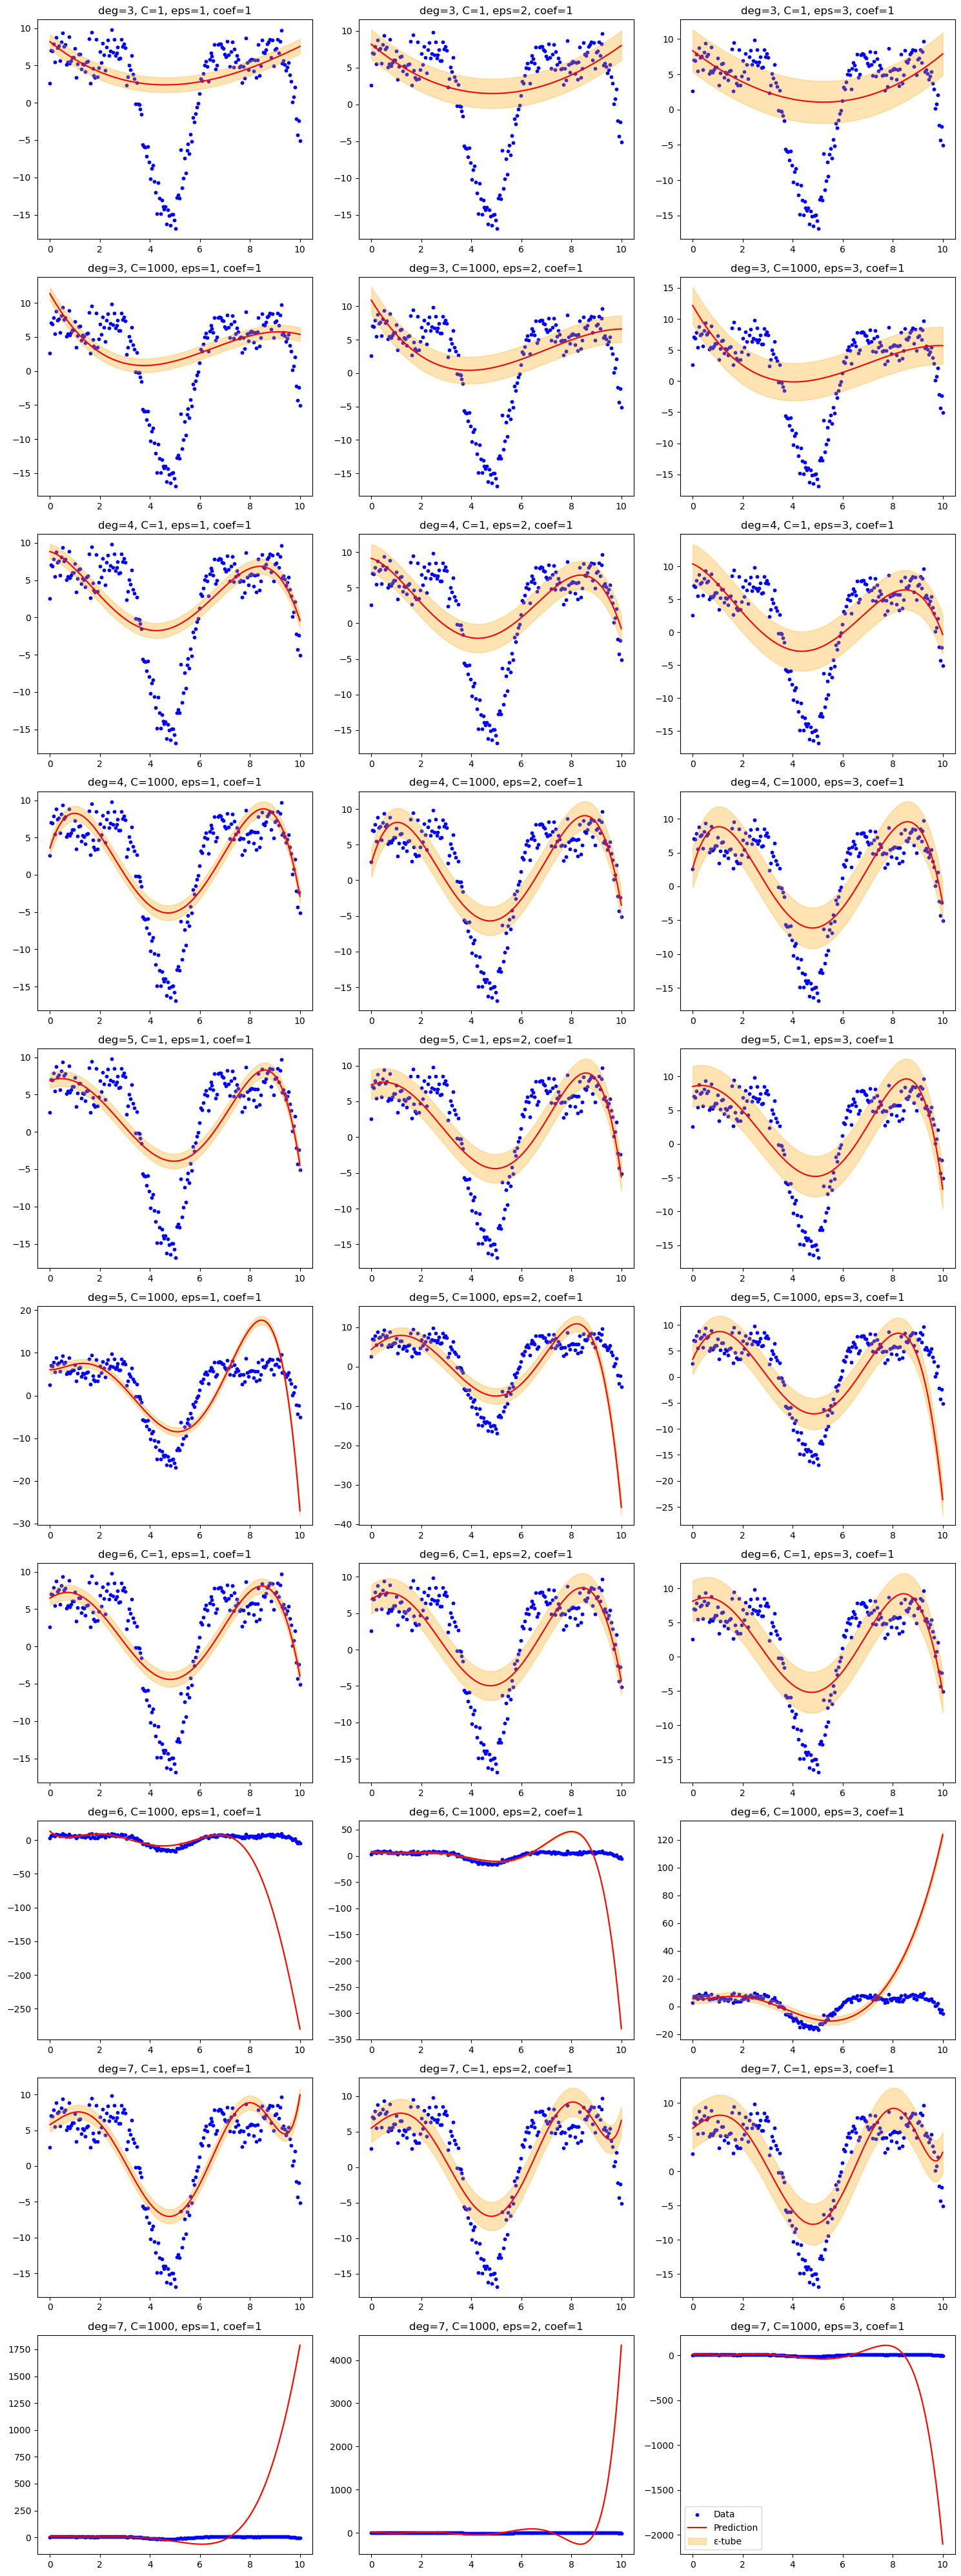

In [7]:
from itertools import product

X = np.linspace(0, 10, 200).reshape(-1, 1)
y = np.sin(X.ravel()) * 10 + np.cos(2*X.ravel()) * 5 + np.random.randn(200) * 1.5

degrees = [3, 4 ,5, 6, 7]
epsilons = [1, 2, 3]
c = [1, 1000]
coefs = [1]

combinations = list(product(degrees, c, epsilons, coefs))

n = len(combinations)
cols = 3
rows = int(np.ceil(n / cols))
plt.figure(figsize=(5*cols, 4*rows))

for idx, (deg, c, eps, coef) in enumerate(combinations, 1):
    svr_poly = SVR(kernel='poly', degree=deg, C=c, epsilon=eps, coef0=coef)
    svr_poly.fit(X, y)

    y_pred = svr_poly.predict(X)
    y_up = y_pred + svr_poly.epsilon
    y_down = y_pred - svr_poly.epsilon

    plt.subplot(rows, cols, idx)
    plt.scatter(X, y, color='blue', s=10, label='Data')
    plt.plot(X, y_pred, color='red', label='Prediction')
    plt.fill_between(X.ravel(), y_down, y_up, color='orange', alpha=0.3, label='ε-tube')
    plt.title(f"deg={deg}, C={c}, eps={eps}, coef={coef}")
    plt.tight_layout()

plt.legend()
plt.show()

You can see that with polynomial kernel we can capture more complex relationships in the data. The parameter $ degree $ controls the flexibility of the polynomial kernel: higher degrees allow the model to fit more complex patterns but also increase the risk of overfitting. In fact, with a very high degree, the model may fit the noise in the training data instead of the underlying trend, leading to poor generalization on new data.
$ coef0 $ shifts the polynomial kernel, allowing lower-degree terms to influence the model and making it more flexible.
If you want you can try to change some parameters like $ C $ and epsilon to see how they affect the model.
The parameter $ C $ in an SVR controls the trade-off between model complexity and training error.
- Small $ C $: the model becomes “softer,” meaning it allows more errors to keep a larger margin or simpler function. This can help prevent overfitting but may increase training error.
- Large $ C $: the model tries to minimize training errors, even if this means a narrower margin or more complex function. This can improve accuracy on the training set but increases the risk of overfitting on new data.

This is the formula: $$
K(x, x') = (\gamma \langle x, x' \rangle + \text{coef0})^{d}
$$

It's interesting see all the difference all the plot above. In some case we have overfitting, in other case underfitting and in other case a good fit. It's important to find a right set up with a good trade off.

You can try to change the parameters of $ c, degree, epsilon $ and $ coef0 $ to see how they affect the model. Remember that the time of computation can increase with the increase of the parameters.

There are other type of kernel that We can try like RBF kernel or Sigmoid kernel.




## RBF Kernel

The RBF kernel (Radial Basis Function) measures similarity between points based on their distance from each other. “Radial” means the function depends only on the distance from a center and “basis function” refers to using these localized bumps to build the model. The parameter gamma controls how quickly similarity decreases: large gamma makes the model focus on nearby points (more complex), small gamma makes it smoother and more global.
If gamma is too large, the model may overfit the training data, capturing noise instead of the underlying pattern. If gamma is too small, the model may underfit, failing to capture important patterns in the data.

The formula for the RBF kernel is:
$$ K(x_i, x_j) = \exp\left(-\gamma \, \lVert x_i - x_j \rVert^2 \right) $$


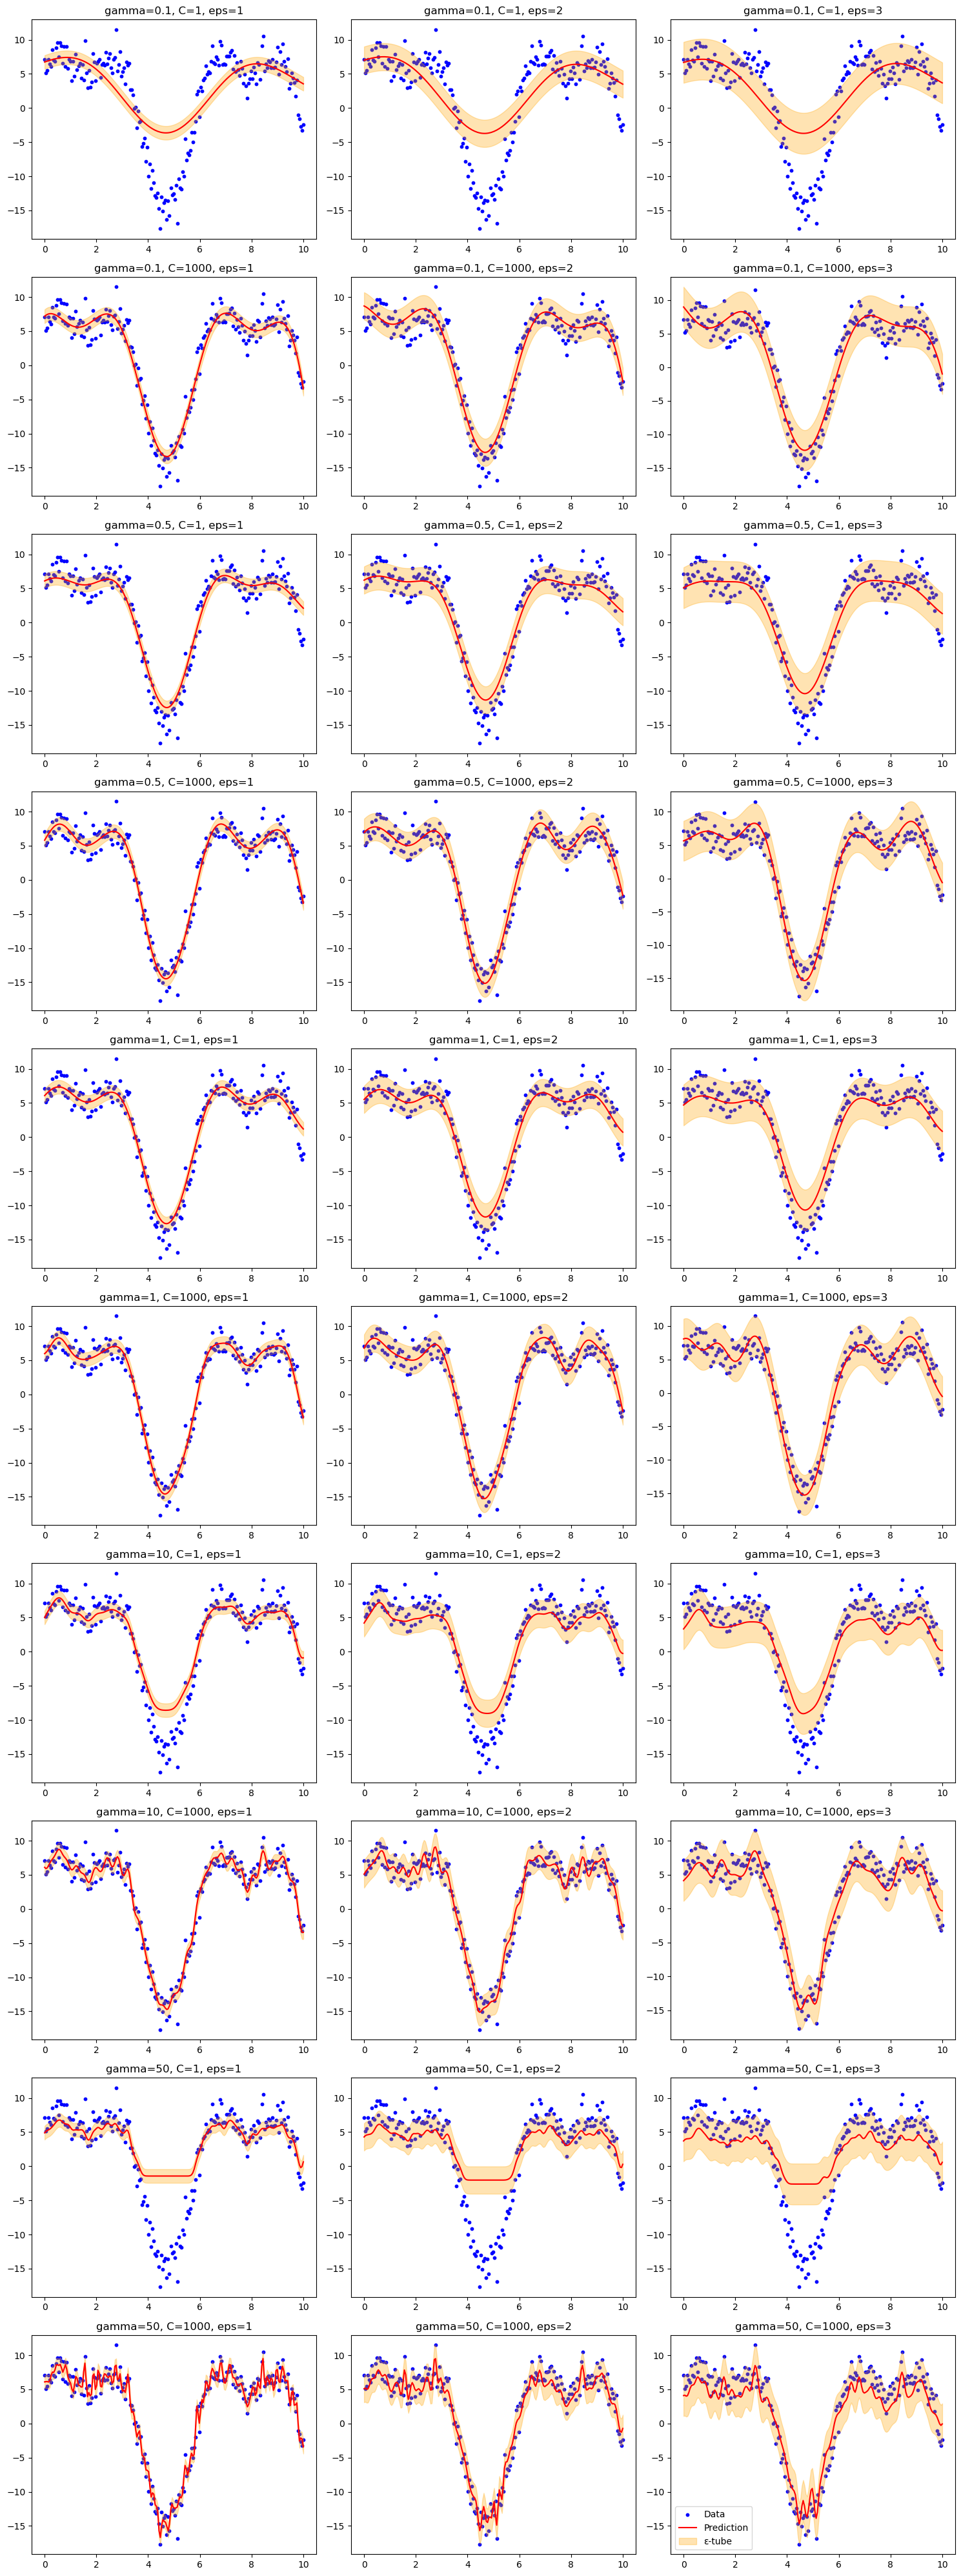

In [8]:
X = np.linspace(0, 10, 200).reshape(-1, 1)
y = np.sin(X.ravel()) * 10 + np.cos(2*X.ravel()) * 5 + np.random.randn(200) * 1.5

epsilons = [1, 2, 3]
c = [1, 1000]
gamma = [0.1, 0.5, 1, 10, 50]

combinations = list(product(gamma, c, epsilons))

n = len(combinations)
cols = 3
rows = int(np.ceil(n / cols))
plt.figure(figsize=(5*cols, 4*rows))
for idx, (gamma, C, eps) in enumerate(combinations, 1):
    svr_rbf = SVR(kernel='rbf', C=C, epsilon=eps, gamma=gamma)
    svr_rbf.fit(X, y)

0    y_pred = svr_rbf.predict(X)

    # Fascia epsilon
    epsilon = svr_rbf.epsilon
    y_up = y_pred + epsilon
    y_down = y_pred - epsilon

    plt.subplot(rows, cols, idx)
    plt.scatter(X, y, color='blue', s=10, label='Data')
    plt.plot(X, y_pred, color='red', label='Prediction')
    plt.fill_between(X.ravel(), y_down, y_up, color='orange', alpha=0.3, label='ε-tube')
    plt.title(f"gamma={gamma}, C={C}, eps={eps}")
    plt.tight_layout()

plt.legend()
plt.show()


This is a good example because give us some important information. First is that for example if $ gamma $ is too high we have overfitting, in fact the model fit all the data but it's not a good model because it fit also the noise. If $ gamma $ is too low we have underfitting, in fact the model is not able to capture the trend of the data. This is not the only things that affect the data because there is also $ C $ that affect the model. We can see clearly in the last two example, with gamma = 50 that whit C=1 we have a wrong function because don't capture the low peak but with C=1000 We have an overfitting of the data because take too much informaition like noise and we can see better than the previous example but the fuction it's too dirty.


## Sigmoid Kernel
The Sigmoid kernel is inspired by neural networks and is defined as:
$$ K(x_i, x_j) = \tanh(\gamma \langle x_i, x_j \rangle + \text{coef0}) $$
It can model complex relationships but is less commonly used than RBF or polynomial kernels. The parameters gamma and coef0 control the shape of the kernel, affecting model flexibility and fit.

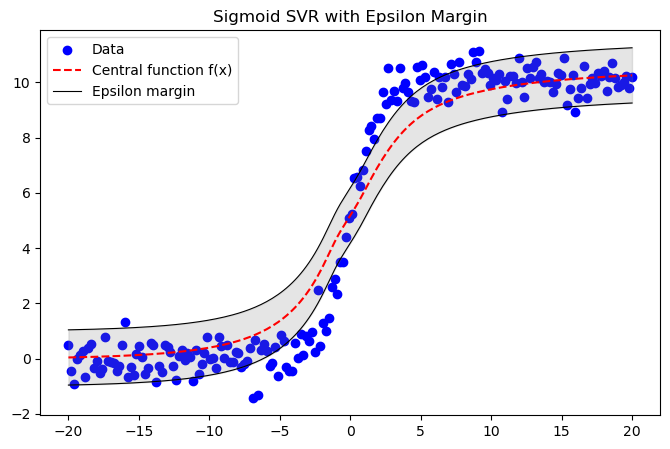

In [9]:
X = np.linspace(-20, 20, 200).reshape(-1, 1)
y = 10 / (1 + np.exp(-X.ravel())) + np.random.randn(200) * 0.5

# Modello SVR con kernel Sigmoid
svr_sigmoid = SVR(kernel='sigmoid', C=0.1, epsilon=1, gamma=0.1, coef0=1)

svr_sigmoid.fit(X, y)

# Predizione
y_pred = svr_sigmoid.predict(X)

# Fascia epsilon
epsilon = svr_sigmoid.epsilon
y_up = y_pred + epsilon
y_down = y_pred - epsilon

# Plot
plt.figure(figsize=(8,5))
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, y_pred, 'r--', label='Central function f(x)')
plt.plot(X, y_up, 'k-', linewidth=0.8, label='Epsilon margin')
plt.plot(X, y_down, 'k-', linewidth=0.8)
plt.fill_between(X.ravel(), y_down, y_up, color='gray', alpha=0.2)
plt.legend()
plt.title("Sigmoid SVR with Epsilon Margin")
plt.show()

I try to find I good fit with the data that i have. The type of data are different respect to the previous example. In this case the data have a sigmoid shape so I try to use a sigmoid kernel. The parameters that I use are:
- C=0.1: it's a small value that allow a more flexible model that can capture the trend of the data.
- epsilon=1: it's a moderate value that allow some tolerance to errors, balancing fit and generalization.
- gamma=0.1: it's a small value that make the model more global and less sensitive to individual data points.
- coef0=1: it's a moderate value that balances the influence of higher-order and lower-order terms in the kernel function.

I use this parameter but you can try to change them to see how they affect the model.
For example you can see easily how this model is complex, for example you can change C with an higher value and you can see the changes(you just need to change C=0.2).


## Real Case Study
Now we can see a real case study with a dataset. We can try with different type of kernel over dataset.
The dataset that we use are:
- Wine Quality Dataset: This dataset contains various chemical properties of red and white wines, along with their quality ratings. The goal is to predict the quality of the wine based on its chemical attributes. The dataset includes features such as acidity, sugar content, pH level, and alcohol content.

I try to use different type of kernel and see the results. I also try to normalize the data and sort them to see how it affect the model.

I make a function that run all the model with different type of kernel and plot the results to avoid to repeat the code. When you call runAllSVRModel you can scegliere la colonna che vuoi usare, se normalizzare i dati e se ordinare i valori.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, RepeatedKFold, cross_val_score, cross_val_predict

In [ ]:
def runAllSVRModel(df, feature_columns=None, target=None, normalize=True, test_size=0.2, sort_for_plot=True, models=None, cross_validate=True, n_splits=5, n_repeats=2):

    y = df[[str(target)]].values
    X = df[feature_columns].values

    if normalize:
        scaler_X = MinMaxScaler()
        scaler_y = MinMaxScaler()
        X_scaled = scaler_X.fit_transform(X)
        y_scaled = scaler_y.fit_transform(y).ravel()
    else:
        X_scaled = X
        y_scaled = y.ravel()
        scaler_y = None

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=test_size, random_state=42)

    results = {}
    colors = {"Linear": "green", "Polynomial": "red", "RBF": "purple", "Sigmoid": "orange"}

    print(f"\n=== SVR Evaluation on Target '{target}' ({'Normalized' if normalize else 'Raw'}) ===\n")

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred_scaled = model.predict(X_test)

        # Inverse scaling
        if normalize:
            y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))
            y_test_orig = scaler_y.inverse_transform(y_test.reshape(-1, 1))
        else:
            y_pred = y_pred_scaled.reshape(-1, 1)
            y_test_orig = y_test.reshape(-1, 1)

        # Compute metrics
        mse = mean_squared_error(y_test_orig, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test_orig, y_pred)
        r2 = r2_score(y_test_orig, y_pred)
        smape = np.mean(np.abs((y_test_orig - y_pred) / (np.abs(y_test_orig) + np.abs(y_pred))/2)) * 100

        results[name] = {"RMSE": rmse, "MAE": mae, "SMAPE": smape, "R2": r2,"pred": y_pred_scaled}

        # Optional: Cross-validation performance
        cv = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=0)
        cv_scores = cross_val_score(model, X_scaled, y_scaled,scoring='neg_root_mean_squared_error', cv=cv)
        results[name]['CV_RMSE_mean'] = -cv_scores.mean()
        results[name]['CV_RMSE_std'] = cv_scores.std()

    # === Print results ===
    print("Model Performance Summary:")
    for name, metrics in results.items():
        print(f"{name:10s} → RMSE: {metrics['RMSE']:.3f} | MAE: {metrics['MAE']:.3f} | "
              f"MAPE: {metrics['SMAPE']:.2f}% | R²: {metrics['R2']:.3f} | "
              f"CV-RMSE: {metrics['CV_RMSE_mean']:.3f} ± {metrics['CV_RMSE_std']:.3f}")

    if X.shape[1] == 1:
        plt.figure(figsize=(12, 7))
        plt.scatter(X, y, color='blue', s=10, alpha=0.5, label='Data')
        sort_idx = np.argsort(X_scaled.ravel()) if sort_for_plot else np.arange(len(X_scaled))
        X_sorted = X_scaled[sort_idx]
        X_sorted_orig = X[sort_idx]

        for name, model in models.items():
            y_plot_scaled = model.predict(X_sorted)
            y_plot = scaler_y.inverse_transform(y_plot_scaled.reshape(-1, 1)) if normalize else y_plot_scaled.reshape(-1, 1)
            plt.plot(X_sorted_orig, y_plot, color=colors[name], linewidth=2, label=f"{name} SVR")

        plt.title(f"SVR Models ({'Normalized' if normalize else 'Raw'}) - Target: {target}")
        plt.xlabel(feature_columns[0])
        plt.ylabel(target)
        plt.legend()
        plt.show()

    elif X.shape[1] == 2:
        x1 = np.linspace(X_scaled[:, 0].min(), X_scaled[:, 0].max(), 60)
        x2 = np.linspace(X_scaled[:, 1].min(), X_scaled[:, 1].max(), 60)
        X1_grid, X2_grid = np.meshgrid(x1, x2)
        X_grid = np.c_[X1_grid.ravel(), X2_grid.ravel()]

        fig = go.Figure()
        fig.add_trace(go.Scatter3d(
            x=X[:, 0], y=X[:, 1], z=y.ravel(),
            mode='markers', marker=dict(size=3, color='blue', opacity=0.5), name='Data'
        ))

        for name, model in models.items():
            y_grid_scaled = model.predict(X_grid)
            y_grid = scaler_y.inverse_transform(y_grid_scaled.reshape(-1, 1)) if normalize else y_grid_scaled.reshape(-1, 1)
            Y_surface = y_grid.reshape(X1_grid.shape)
            fig.add_trace(go.Surface(
                x=X1_grid, y=X2_grid, z=Y_surface,
                colorscale='Viridis', opacity=0.6,
                name=name, showscale=False
            ))

        fig.update_layout(
            title=f"Interactive SVR Surfaces - Target: {target}",
            scene=dict(
                xaxis_title=feature_columns[0],
                yaxis_title=feature_columns[1],
                zaxis_title=target,
            ),
            height=800
        )
        fig.show()

    else:
        plt.figure(figsize=(7, 5))
        all_preds = list(results.values())[0]["pred"]
        plt.hist(all_preds, bins=30, alpha=0.6, color='purple')
        plt.title(f"Distribution of Predictions (High-Dim space)")
        plt.xlabel("Predicted (scaled)")
        plt.ylabel("Frequency")
        plt.show()

    return results


In [1]:
df = pd.read_csv('data/Used_Car_Price_Prediction.csv', sep=',')

# Definisci i modelli SVR da testare
models = {
    "Linear": SVR(kernel='linear', C=100, epsilon=0.1),
    "Polynomial": SVR(kernel='poly', degree=3, C=100, epsilon=0.1, coef0=1),
    "RBF": SVR(kernel='rbf', C=100, epsilon=0.1, gamma='scale'),
    "Sigmoid": SVR(kernel='sigmoid', C=0.1, epsilon=1, gamma='scale', coef0=1)
}

df_clean = df.copy()

numerical_cols = ['sale_price', 'yr_mfr', 'kms_run', 'times_viewed', 'total_owners']
df_clean = df_clean[numerical_cols].dropna()

print("Dataset caricato e pulito. Dimensioni:", df_clean.shape)
print(df_clean.head())

# --- Esempio 1: Grafico 2D (1 feature) ---
print("\n\n*** AVVIO ESECUZIONE 1: Grafico 2D (sale_price vs kms_run) ***")
# Usa un campione per velocizzare l'esecuzione e migliorare la leggibilità del grafico
df_sample_2d = df_clean.sample(n=min(3000, len(df_clean)), random_state=42)
runAllSVRModel(
    df=df_sample_2d,
    feature_columns=['kms_run'],
    target='sale_price',
    models=models
)

# --- Esempio 2: Grafico 3D (2 feature) ---
print("\n\n*** AVVIO ESECUZIONE 2: Grafico 3D (sale_price vs kms_run & yr_mfr) ***")
# Uso un campione più piccolo per velocizzare l'addestramento per la visualizzazione 3D
df_sample_3d = df_clean.sample(n=min(2000, len(df_clean)), random_state=42)
runAllSVRModel(
    df=df_sample_3d,
    feature_columns=['kms_run', 'yr_mfr'],
    target='sale_price',
    models=models
)

# --- Esempio 3: Modello completo (più feature, nessuna visualizzazione) ---
print("\n\n*** AVVIO ESECUZIONE 3: Modello completo (senza grafico) ***")
runAllSVRModel(
    df=df_clean,
    feature_columns=['yr_mfr', 'kms_run', 'times_viewed', 'total_owners'],
    target='sale_price',
    models=models
)

NameError: name 'pd' is not defined

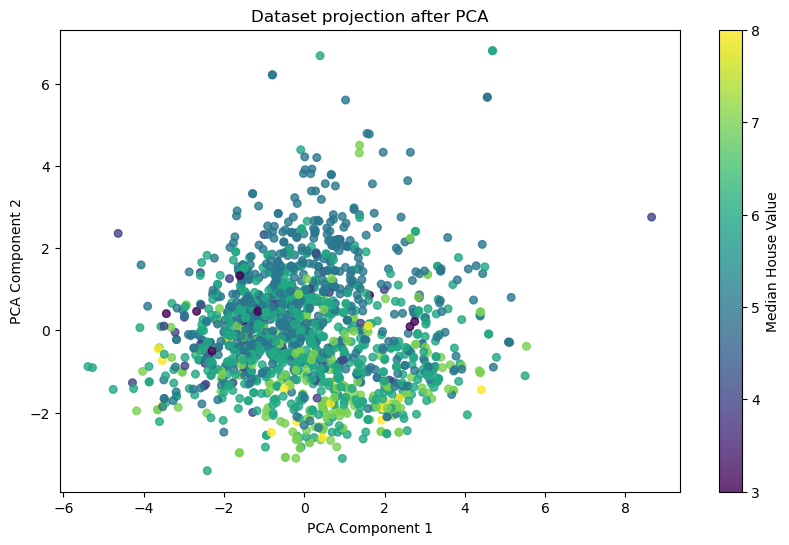

Explained variance ratio per component: [0.28173931 0.1750827 ]
Total variance explained (2D): 0.4568220118429404


In [14]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# --- 1. Carica dataset ---
df = pd.read_csv('data/winequality-red.csv', sep=';')
df_clean = df.copy()
df_clean = df_clean.dropna()


# --- 2. Separazione features e target (se vuoi colorare il plot) ---
X = df_clean.drop('quality', axis=1)
y = df_clean['quality']  # opzionale per colorare il plot

# --- 3. Standardizzazione (consigliata prima della PCA) ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- 4. PCA a 2 componenti ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# --- 5. Visualizzazione ---
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=30, alpha=0.8)
plt.colorbar(scatter, label='Median House Value')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Dataset projection after PCA')
plt.show()

# --- 6. Opzionale: varianza spiegata ---
print("Explained variance ratio per component:", pca.explained_variance_ratio_)
print("Total variance explained (2D):", sum(pca.explained_variance_ratio_))


Now that we are working with a much larger dataset and a significantly higher number of features than before, manually testing all kernel types along with their corresponding hyperparameters becomes a challenging and time-consuming task.
For this reason, we will use the Grid Search Cross-Validation technique, which automates the process of finding the optimal hyperparameters for our SVR model.
After performing the Grid Search, we can compare the results obtained with the different kernels and select the one that delivers the best performance in terms of accuracy and generalization on the test data. This will allow us to evaluate how each kernel behaves with various parameter configurations and determine which one best fits the dataset we are working with.
The following code is computationally intensive, as it uses most of the CPU resources to parallelize the process. If you wish, you can modify the parameters inside param_grid to reduce computation time or explore different values.
The pipeline consists of the following steps:
- SimpleImputer: Handles missing values by replacing them with the median of each feature.
- StandardScaler: Standardizes the features by removing the mean and scaling to unit variance.
- SVR: The Support Vector Regression model itself, which will be tuned using Grid Search.

In the Grid Search, we define a parameter grid that includes different kernel types (RBF, linear, polynomial, sigmoid), along with a range of hyperparameters specific to each kernel. The Grid Search evaluates all combinations of these parameters using 3-fold cross-validation and multiple scoring metrics (MSE, MAE, R²). The best model is selected based on the highest R² score.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

df = pd.read_csv('data/1553768847-housing.csv', sep=',')
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = [
    {
        'svr__kernel': ['rbf'],
        'svr__C': [1, 10, 100, 1000],
        'svr__gamma': ['scale', 0.01, 0.1, 0.5, 1],
        'svr__epsilon': [1, 10, 50, 100]
    },
    {
        'svr__kernel': ['linear'],
        'svr__C': [1, 10, 100, 1000],
        'svr__epsilon': [1, 10, 50, 100]
    },
    {
        'svr__kernel': ['poly'],
        'svr__C': [1, 10, 100],
        'svr__degree': [2, 3, 4, 5],
        'svr__epsilon': [1, 10, 50, 100],
        'svr__coef0': [0.01, 0.1, 1]
    },
    {
        'svr__kernel': ['sigmoid'],
        'svr__C': [0.1, 1, 10, 100],
        'svr__gamma': ['scale', 0.01, 0.1, 1],
        'svr__coef0': [0.01, 0.1, 1],
        'svr__epsilon': [1, 10, 50, 100]
    }
]

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('svr', SVR(kernel='rbf'))
])

scoring = {
    'MSE': 'neg_mean_squared_error',
    'MAE': 'neg_mean_absolute_error',
    'R2': 'r2'
}

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=3,
    scoring=scoring,
    refit='R2',
    verbose=2,
    n_jobs=-1
)

print("Running Grid Search to find optimal parameters...")
grid_search.fit(X_train, y_train)

results = pd.DataFrame(grid_search.cv_results_)
results['MSE'] = -results['mean_test_MSE']
results['MAE'] = -results['mean_test_MAE']
results['R2'] = results['mean_test_R2']

best_per_kernel = (
    results
    .sort_values('MSE')
    .groupby('param_svr__kernel')
    .first()
    .reset_index()
)

summary_df = best_per_kernel[[
    'param_svr__kernel', 'MSE', 'MAE', 'R2'
]].copy()

summary_df.rename(columns={
    'param_svr__kernel': 'Kernel',
    'MSE': 'Mean Squared Error',
    'MAE': 'Mean Absolute Error',
    'R2': 'R² Score'
}, inplace=True)

param_cols = [c for c in best_per_kernel.columns if c.startswith('param_')]
summary_df['Best Parameters'] = best_per_kernel[param_cols].apply(
    lambda row: {c.replace('param_', ''): row[c] for c in param_cols if pd.notna(row[c])},
    axis=1
)

summary_df = summary_df.round(3)

print("\n=== SUMMARY TABLE: Best Performance per Kernel ===")
display(summary_df)


Running Grid Search to find optimal parameters...
Fitting 3 folds for each of 448 candidates, totalling 1344 fits
[CV] END svr__C=1, svr__epsilon=1, svr__gamma=scale, svr__kernel=rbf; total time=   8.1s
[CV] END svr__C=1, svr__epsilon=1, svr__gamma=0.1, svr__kernel=rbf; total time=   8.1s
[CV] END svr__C=1, svr__epsilon=1, svr__gamma=0.01, svr__kernel=rbf; total time=   8.2s
[CV] END svr__C=1, svr__epsilon=1, svr__gamma=0.1, svr__kernel=rbf; total time=   8.4s
[CV] END svr__C=1, svr__epsilon=1, svr__gamma=0.01, svr__kernel=rbf; total time=   8.4s
[CV] END svr__C=1, svr__epsilon=1, svr__gamma=scale, svr__kernel=rbf; total time=   8.6s
[CV] END svr__C=1, svr__epsilon=1, svr__gamma=0.01, svr__kernel=rbf; total time=   8.6s
[CV] END svr__C=1, svr__epsilon=1, svr__gamma=scale, svr__kernel=rbf; total time=   8.6s
[CV] END svr__C=1, svr__epsilon=1, svr__gamma=0.1, svr__kernel=rbf; total time=   8.6s
[CV] END svr__C=1, svr__epsilon=1, svr__gamma=0.5, svr__kernel=rbf; total time=  11.5s
[CV] EN

,Kernel,Mean Squared Error,Mean Absolute Error,R² Score,Overall Score,Best Parameters
0,linear,4.898712e+09,48455.695,0.634,0.994,"{'svr__kernel': 'linear', 'svr__C': 1000.0, 's..."
1,poly,6.352049e+09,48061.191,0.526,0.992,"{'svr__kernel': 'poly', 'svr__C': 100.0, 'svr_..."
2,rbf,5.513558e+09,50846.239,0.588,0.978,"{'svr__kernel': 'rbf', 'svr__C': 1000.0, 'svr_..."
3,sigmoid,7.384296e+09,60013.270,0.448,0.920,"{'svr__kernel': 'sigmoid', 'svr__C': 100.0, 's..."



Best overall model: linear kernel
Overall Score: 0.994
R²: 0.634, MSE: 4898712434.014, MAE: 48455.695
Parameters: {'svr__kernel': 'linear', 'svr__C': 1000.0, 'svr__epsilon': 100}


It's important to remember that MSE and MAE are error metrics (where lower values are better), while R² is a goodness-of-fit metric (where higher values are better). Therefore, when evaluating model performance, we look for the lowest MSE and MAE values or the highest R² value.

We are now working in a high-dimensional space, so it’s not possible to plot the results directly. We can only evaluate the final performance of the best model on the test set.

However, it’s possible to visualize the data by applying a dimensionality reduction technique, such as PCA, to project it into a lower-dimensional space.